In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pydataset import data

import wrangle

### Acquire data using function

In [2]:
df = wrangle.get_zillow_data()
df.head()

Reading from csv file...


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,NaN,6.037124e+13,0.006940,2017-01-01,NaN,Central,NaN,NaN,Condominium,NaN


### Wrangle data using function

In [3]:
df = wrangle.wrangle_zillow(df)
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,Single Family Residential,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,3101.0,96451.0,1964.0,73681.0,119407.0,45726.0,1533.89,0.006940,2017-01-01,Condominium,Los_Angeles
5,17143294,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,2061.0,97091.0,1982.0,198640.0,331064.0,132424.0,3508.10,-0.020526,2017-01-01,Condominium,Ventura


### Split data using function

In [4]:
train, validate, test = wrangle.split_data(df)

Dataframe has been split: 
Train: (23881, 19)
Validate: (10236, 19)
Test: (8530, 19)


### Scale data using function

In [5]:
mm_scaler, train_mm, validate_mm, test_mm = wrangle.min_max_scaler(train, validate, test)

In [6]:
train_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23881 entries, 1486 to 63315
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      23881 non-null  float64
 1   bathroomcnt                   23881 non-null  float64
 2   bedroomcnt                    23881 non-null  float64
 3   calculatedfinishedsquarefeet  23881 non-null  float64
 4   fips                          23881 non-null  float64
 5   latitude                      23881 non-null  float64
 6   longitude                     23881 non-null  float64
 7   lotsizesquarefeet             23881 non-null  float64
 8   regionidcounty                23881 non-null  float64
 9   regionidzip                   23881 non-null  float64
 10  yearbuilt                     23881 non-null  float64
 11  structuretaxvaluedollarcnt    23881 non-null  float64
 12  taxvaluedollarcnt             23881 non-null  float64
 13

### Let's make a model with logerror and Zip Code

In [19]:
X = train_mm[['logerror', 'regionidzip']]

In [22]:
# Make the model
kmeans = KMeans(n_clusters=5)

# Fit the model
kmeans.fit(X)

kmeans.predict(X)

array([0, 1, 4, ..., 4, 3, 0], dtype=int32)

### Using the elbow method seems like 5 clusters will be good

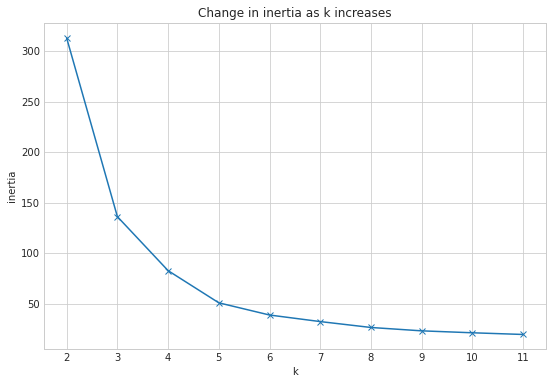

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Add the cluster column for visualizations

In [23]:
train_mm['cluster'] = kmeans.predict(X)
train_mm.cluster = train_mm.cluster.astype('category')
train_mm.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county,cluster,cluster_land
1486,0.041660,0.250000,0.500000,0.405647,1.0,0.750517,0.096322,0.079162,0.426997,0.820117,...,0.234777,0.135556,0.025234,0.137091,0.443835,2017-01-08,Single Family Residential,Ventura,0,2
43618,0.012194,0.000000,0.333333,0.166190,0.0,0.323089,0.656037,0.012565,1.000000,0.192364,...,0.102492,0.165920,0.153275,0.145535,0.429279,2017-06-06,Single Family Residential,Los_Angeles,1,2
19060,0.000585,0.166667,0.166667,0.114189,0.0,0.564342,0.489014,0.011590,1.000000,0.269457,...,0.099946,0.248787,0.264844,0.218258,0.436459,2017-03-22,Single Family Residential,Los_Angeles,4,0
10713,0.000002,0.500000,0.500000,0.433524,0.0,0.598048,0.443504,0.024947,1.000000,0.262115,...,0.302073,0.300841,0.199739,0.273389,0.424999,2017-02-17,Single Family Residential,Los_Angeles,4,0
51407,0.005621,0.500000,0.500000,0.695497,0.0,0.479358,0.510284,0.024148,1.000000,0.035242,...,0.185477,0.160139,0.090544,0.146703,0.448332,2017-06-28,Single Family Residential,Los_Angeles,2,2


### Visualize the model

<AxesSubplot:xlabel='logerror', ylabel='regionidzip'>

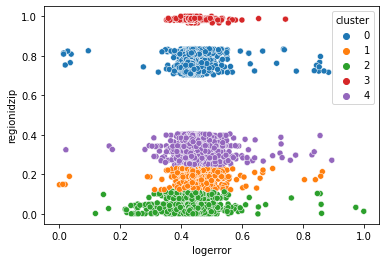

In [24]:
sns.scatterplot(data=train_mm, y = 'regionidzip', x = 'logerror', hue= 'cluster')

### Let's make another model. This time lets use log error and square footage

In [31]:
X = train_mm[['calculatedfinishedsquarefeet', 'logerror']]
# Make the model
kmeans = KMeans(n_clusters=5)

# Fit the model
kmeans.fit(X)

kmeans.predict(X)

array([3, 0, 1, ..., 4, 2, 3], dtype=int32)

### Choose number of clusters with inertia

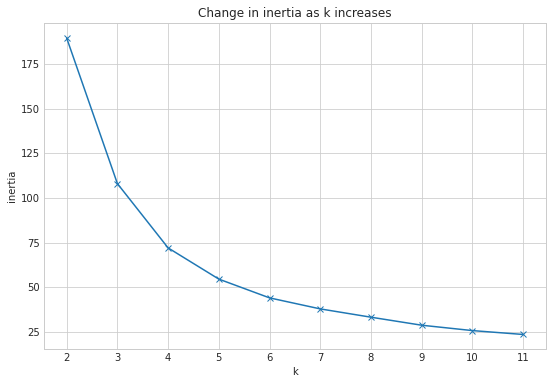

In [30]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [32]:
train_mm['cluster_land'] = kmeans.predict(X)
train_mm.cluster_land = train_mm.cluster_land.astype('category')
train_mm.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county,cluster,cluster_land
1486,0.041660,0.250000,0.500000,0.405647,1.0,0.750517,0.096322,0.079162,0.426997,0.820117,...,0.234777,0.135556,0.025234,0.137091,0.443835,2017-01-08,Single Family Residential,Ventura,0,3
43618,0.012194,0.000000,0.333333,0.166190,0.0,0.323089,0.656037,0.012565,1.000000,0.192364,...,0.102492,0.165920,0.153275,0.145535,0.429279,2017-06-06,Single Family Residential,Los_Angeles,1,0
19060,0.000585,0.166667,0.166667,0.114189,0.0,0.564342,0.489014,0.011590,1.000000,0.269457,...,0.099946,0.248787,0.264844,0.218258,0.436459,2017-03-22,Single Family Residential,Los_Angeles,4,1
10713,0.000002,0.500000,0.500000,0.433524,0.0,0.598048,0.443504,0.024947,1.000000,0.262115,...,0.302073,0.300841,0.199739,0.273389,0.424999,2017-02-17,Single Family Residential,Los_Angeles,4,3
51407,0.005621,0.500000,0.500000,0.695497,0.0,0.479358,0.510284,0.024148,1.000000,0.035242,...,0.185477,0.160139,0.090544,0.146703,0.448332,2017-06-28,Single Family Residential,Los_Angeles,2,4


<AxesSubplot:xlabel='logerror', ylabel='calculatedfinishedsquarefeet'>

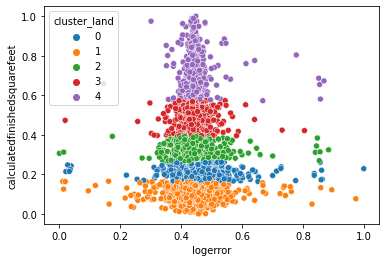

In [33]:
sns.scatterplot(data=train_mm, y='calculatedfinishedsquarefeet', x='logerror', hue= 'cluster_land') 

### Let's make another model, this time we're going use tax value and log error

In [36]:
X = train_mm[['taxvaluedollarcnt', 'logerror']]
# Make the model
kmeans = KMeans(n_clusters=4)

# Fit the model
kmeans.fit(X)

kmeans.predict(X) 

array([0, 2, 2, ..., 3, 0, 2], dtype=int32)

### Choose number of clusters using the elbow method

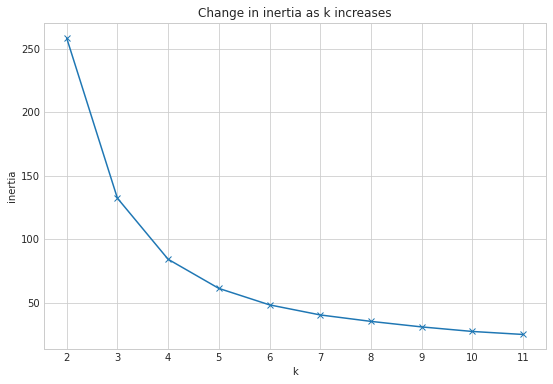

In [37]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [38]:
train_mm['cluster_val'] = kmeans.predict(X)
train_mm.cluster_val = train_mm.cluster_val.astype('category')
train_mm.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county,cluster,cluster_land,cluster_val
1486,0.041660,0.250000,0.500000,0.405647,1.0,0.750517,0.096322,0.079162,0.426997,0.820117,...,0.135556,0.025234,0.137091,0.443835,2017-01-08,Single Family Residential,Ventura,0,3,0
43618,0.012194,0.000000,0.333333,0.166190,0.0,0.323089,0.656037,0.012565,1.000000,0.192364,...,0.165920,0.153275,0.145535,0.429279,2017-06-06,Single Family Residential,Los_Angeles,1,0,2
19060,0.000585,0.166667,0.166667,0.114189,0.0,0.564342,0.489014,0.011590,1.000000,0.269457,...,0.248787,0.264844,0.218258,0.436459,2017-03-22,Single Family Residential,Los_Angeles,4,1,2
10713,0.000002,0.500000,0.500000,0.433524,0.0,0.598048,0.443504,0.024947,1.000000,0.262115,...,0.300841,0.199739,0.273389,0.424999,2017-02-17,Single Family Residential,Los_Angeles,4,3,2
51407,0.005621,0.500000,0.500000,0.695497,0.0,0.479358,0.510284,0.024148,1.000000,0.035242,...,0.160139,0.090544,0.146703,0.448332,2017-06-28,Single Family Residential,Los_Angeles,2,4,2


<AxesSubplot:xlabel='logerror', ylabel='taxvaluedollarcnt'>

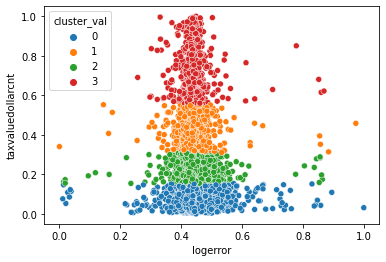

In [39]:
sns.scatterplot(data=train_mm, y='taxvaluedollarcnt', x='logerror', hue= 'cluster_val') 

### Let's make one more clusterin model. This time using latitude and longitude

In [42]:
X = train_mm[['latitude', 'longitude']]
# Make the model
kmeans = KMeans(n_clusters=6)

# Fit the model
kmeans.fit(X)

kmeans.predict(X) 

array([2, 0, 1, ..., 1, 4, 2], dtype=int32)

### Choose number of clusters using the elbow method

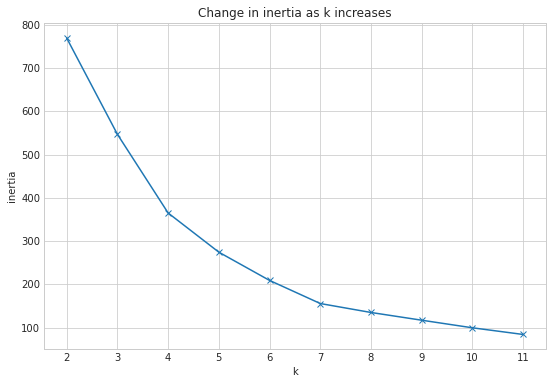

In [43]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [44]:
train_mm['cluster_lat'] = kmeans.predict(X)
train_mm.cluster_lat = train_mm.cluster_lat.astype('category')
train_mm.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,...,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county,cluster,cluster_land,cluster_val,cluster_lat
1486,0.041660,0.250000,0.500000,0.405647,1.0,0.750517,0.096322,0.079162,0.426997,0.820117,...,0.025234,0.137091,0.443835,2017-01-08,Single Family Residential,Ventura,0,3,0,2
43618,0.012194,0.000000,0.333333,0.166190,0.0,0.323089,0.656037,0.012565,1.000000,0.192364,...,0.153275,0.145535,0.429279,2017-06-06,Single Family Residential,Los_Angeles,1,0,2,0
19060,0.000585,0.166667,0.166667,0.114189,0.0,0.564342,0.489014,0.011590,1.000000,0.269457,...,0.264844,0.218258,0.436459,2017-03-22,Single Family Residential,Los_Angeles,4,1,2,1
10713,0.000002,0.500000,0.500000,0.433524,0.0,0.598048,0.443504,0.024947,1.000000,0.262115,...,0.199739,0.273389,0.424999,2017-02-17,Single Family Residential,Los_Angeles,4,3,2,1
51407,0.005621,0.500000,0.500000,0.695497,0.0,0.479358,0.510284,0.024148,1.000000,0.035242,...,0.090544,0.146703,0.448332,2017-06-28,Single Family Residential,Los_Angeles,2,4,2,1


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

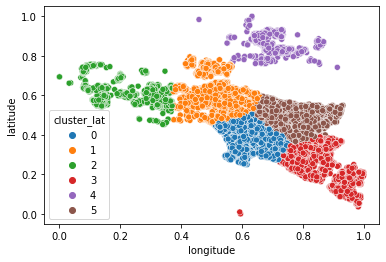

In [46]:
sns.scatterplot(data=train_mm, y='latitude', x='longitude', hue= 'cluster_lat') 